__Dhyan Thakkar__
<br>
Date: Jan. 21, 2021
<br>
PHYS 2030 W

# <center><font color=#46769B>Exercise 5: Cosmic rays</font></center>

## <font color=#46769B>Introduction:</font>

Our goals for this notebook are:
- Make a simulation for the angle of cosmic rays when hitting the Earth.

Required reading:
- *Lesson 3: Sampling from arbitrary distributions*

## <font color=#46769B>Cosmic rays:</font>

Cosmic rays are high-energy protons and heavier elements accelerated in stars and other astronomical environments that ultimately smash into Earth's atmosphere. These collisions produce showers of particles.

<div>
<img src="https://cdn.mos.cms.futurecdn.net/JZG8KC9eZovtTaXkvbbdiX-1024-80.jpg.webp" width="400">
</div>

Figure credit: [space.com](https://www.space.com/32644-cosmic-rays.html)

## <font color=#46769B>Goal:</font>

Suppose cosmic rays are isotropic and homogenous in our local galactic neighborhood. They are likely to hit the Earth from any direction and at any position. When a cosmic ray hits the Earth, it will have an angle $\theta$ with respect to the atmosphere, shown in the Figure here.

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/cosmic_rays.png" width="500">
</div>

The goal here is figure out what is the probability distribution function for $\theta$. (All values of $\theta$ are *not* equally likely.) We will solve this problem two ways and show that they agree.

# <font color=#46769B>Exercise</font>

The Earth is (approximately) a sphere of radius $R$. Since the cross sectional area of a sphere is a circle, to a cosmic ray, the Earth looks like a dart board.

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/Darts_in_a_dartboard.jpg" width="400">
</div>

Here is another picture to have in mind. Without loss of generality, we orient our coordinate frame so the cosmic ray is pointing down.

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/cosmic-ray-fig-2.png" width="800">
</div>

The cosmic ray hits a sphere, the Earth __(a)__. In projection, this looks like a circle __(b)__. Let's suppose the radius $s$ is the location where the cosmic ray hits the circular cross section of the Earth. (Note: $s \le R$, where $R$ is the radius of the earth.) Once we know $s$, we can figure out the angle the cosmic ray makes with some trigonometry __(c)__:
$$\sin\theta = s/R \, .$$

What is the probability of landing on a particular value of $s$? We need to know the PDF $P(s)$.

Note $P(s) ds$ is the probability of landing between $s$ and $s+ds$. This is
$$ P(s) \, ds = \frac{2 \pi s \, ds}{\pi R^2}$$
where the numerator is the area of a ring of radius $s$ and thickness $ds$, and the denominator is the area $\pi R^2$ of the entire circle.
The PDF is therefore
$$P(s) = \left\{ \begin{array}{cc} \frac{2 s}{R^2} & {\rm for} \; 0 \le s \le R \\ 0 & {\rm otherwise} \end{array} \right. \, .\qquad {\rm (1)}$$ 


## <font color=#46769B>Part (a)</font> 

Perform a simulation generating $N=10^6$ random samples for $\theta$ by sampling $s$ from $P(s)$ in Eq. (1). Here are the steps:
- Determine (analytically) the CDF $C(s)$ corresponding to the PDF $P(s)$. 
- Analytically solve the equation $r = C(s)$ to determine the inverse CDF, $C^{-1}$.
- Write a function `sample_s(num)` that will draw `num` random samples for $s$ from $P(s)$. (You compute $N$ random numbers $r$ in the domain $[0,1]$ and set $s=C^{-1}(r)$).
- For each $s$ in your sample, compute $\theta = \sin^{-1}(s/R)$ to obtain a sample for $\theta$.

Make a histogram plot for your $\theta$ samples.

### <font color=#46769B>Hint:</font> 

You can work in units of "Earth radii" setting $R=1$.

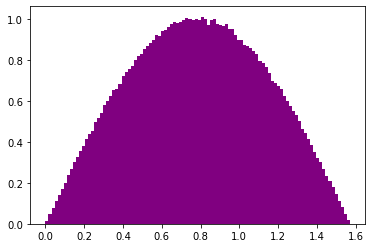

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Analytic solution to P(s) is C(s) = s**2/R**2
# Analytic solution to find the inverse of C(s) is s = np.sqrt(rR**2), we ignore the negative because s cannot be negative

#Define radius of Earth
R = 1

#Define function to randomly sample s: 
def samples_s(num):
  r = np.random.rand(num)
  s_samples = np.sqrt(r*R**2)
  return s_samples 

num = 1000000
samples_s(num)

#Solving for theta 
S = samples_s(num)
theta = []
for i in range(len(S)):
  theta.append(np.arcsin(S[i]/R))

plt.hist(theta, bins= 100, density=True, color= 'purple')
plt.show()

## <font color=#46769B>Chain rule for PDFs</font>

Next, we will obtain $P(\theta)$ directly and sample from that. First, let me clarify the notation a bit. Every variable has *its own* PDF. So, I should write $P_s(s)$ for the PDF for $s$ (given above) and $P_\theta(\theta)$ will be the PDF for $\theta$ that I will derive now.

This is just to clarify that $P_s$ is a completely different function than $P_\theta$. They are related by the chain rule.

The key idea is that probabilities (not the PDFs) should be invariant no matter what variables I use. If a cosmic ray hits a certain patch of sky 5\% of the time, it doesn't matter if I describe that patch in terms of $s$ or $\theta$. This idea is written formally as 
$$P_s(s) \, ds = P_\theta(\theta) \, d\theta \, ,$$
which says that the probability of being within the window $[s,s+ds]$ is equal to the probability of being within the window $[\theta,\theta+d\theta]$.
Rearranging this equation, we have
$$P_\theta(\theta) = P_s(s) \, \frac{ds}{d\theta}\, .$$
Plugging in $P_s(s)$, and using the facts that $s=R \sin\theta$ and $ds/d\theta = R \cos\theta$, we have
$$P_\theta(\theta) = \left\{ \begin{array}{cc} \sin 2\theta & {\rm for} \; 0 \le \theta \le \frac{\pi}{2} \\ 
0 & {\rm otherwise} \end{array} \right. \, . \qquad {\rm (2)}$$

## <font color=#46769B>Part (b)</font>

Perform a simulation generating $N=10^6$ random samples for $\theta$ by sampling $\theta$ from $P_\theta(\theta)$ in Eq. (2). Here are the steps:
- Determine (analytically) the CDF $C_\theta(\theta)$ corresponding to the PDF $P_\theta(\theta)$. 
- Analytically solve the equation $r = C_\theta(\theta)$ to determine the inverse CDF, $C_\theta^{-1}$.
- Write a function `sample_theta(num)` that will draw `num` random samples for $\theta$ from $P_\theta(\theta)$.

Make a histogram plot for your $\theta$ samples.

Compare your histogram for parts (a) and (b) and a plot of the curve for $P_\theta(\theta)$. (Make one figure with everything in it.) Everything should agree!





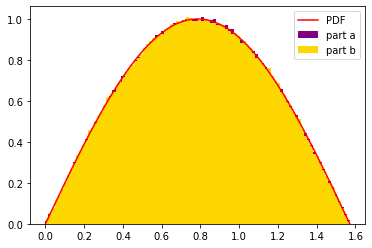

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
#PDF can be rewritten as sin(2theta) = 2sin(theta)cos(theta)
# Analytical solution of C(theta) = (sin(theta))**2
#Solving for theta, theta = np.arcsin(np.sqrt(r))

#Sampling theta 
def sample_theta(num):
  r_theta = np.random.rand(num)
  theta_samples = np.arcsin(np.sqrt(r_theta))
  return theta_samples

num = 1000000
theta1 = sample_theta(num)

# Defining the PDF
x = np.linspace(0,(1/2*np.pi), 1000)
PDF = np.sin(2*x)

plt.plot(x,PDF, color = 'red', label = 'PDF')
plt.hist(theta, bins= 100, density= True, color= 'purple', label = 'part a')
plt.hist(theta1, bins = 100, density= True, color = 'gold', label = 'part b')
plt.legend()
plt.show()